In [1]:
import os
import sys

# For P2P_base located in git_folder (not in this directory)
parent_dir = os.path.abspath("/home/kruu/git_folder/")
root_dir = os.path.join(parent_dir, "P2P_base")
if parent_dir not in sys.path:
    sys.path.append(root_dir)
    
from traffic.data import opensky, airports
from wake import wake, aircraft, meteo
from utils import viz

/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyopensky/impala.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Flight
flight = (
    opensky.history(
        "2018-07-04 08:58:28",
        stop="2018-07-04 09:06:36",
        icao24="4b1887",
        return_flight=True,
    )
    .distance(airports["LSZH"])
    .compute_xy("epsg:2056")
)

# EDR data
fpath_edr = os.path.join(root_dir, "p2p", "EDR.dat")
edr = meteo.EDR.from_dat_file(fpath_edr)

# Meteo Data
meteo_data = meteo.Meteo.from_metar('LSZH', timestamp=flight.stop, bearing=flight.at().track, extrapolate=True)

/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyopensky/trino.py:571: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  StateVectorsData4.hour >= start_ts.floor("1H"),
/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyopensky/trino.py:572: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  StateVectorsData4.hour < stop_ts.ceil("1H"),
/home/kruu/.conda/envs/wake_encounter/lib/python3.10/site-packages/pyarrow/pandas_compat.py:722: DeprecationWarning: DatetimeTZBlock is deprecated and will be removed in a future version. Use public APIs instead.
  klass=_int.DatetimeTZBlock,


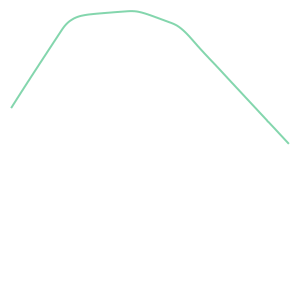

In [3]:
flight

In [4]:
xarray = wake.Wake.generate_many(
    flight=flight,
    edr=edr,
    model="p2p",
    interval=10,
    num_processes=30,
    path= os.path.abspath("/home/kruu/git_folder/wake_encounter/data/test_wakes"),
)

/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/190/fort.13/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/210/fort.13
/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/230/fort.13

/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/290/fort.13
/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/0/fort.13
/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/10/fort.13
/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/60/fort.13
/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/20/fort.13/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/50/fort.13

/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/70/fort.13
/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/180/fort.13/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/260/fort.13

/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/270/fort.13/home/kruu/git_folder/wake_encounter/data/test_wakes/inputs/160/fort.13/

  0%|          | 0/49 [00:00<?, ?it/s]

In [7]:
fig = viz.visualise_wake_along_flight(flight, xarray, t=500)
fig.show()



In [8]:
xarray

Format,coo
Data Type,float64
Shape,"(743, 23427, 2061, 8561)"
nnz,31802
Density,1.0354912969467444e-10
Read-only,True
Size,496.9K
Storage ratio,0.00
Format,coo
Data Type,float64
Shape,"(743, 23427, 2061, 8561)"


In [11]:
xarray.t

<xarray.DataArray 't' (t: 743)> Size: 6kB
array(['2018-07-04T08:58:29.000000000', '2018-07-04T08:58:30.000000000',
       '2018-07-04T08:58:31.000000000', ..., '2018-07-04T09:10:49.000000000',
       '2018-07-04T09:10:50.000000000', '2018-07-04T09:10:51.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * t        (t) datetime64[ns] 6kB 2018-07-04T08:58:29 ... 2018-07-04T09:10:51

In [20]:
xarray.sel(t=xarray.t[-1])["gam_l"]

Format,coo
Data Type,float64
Shape,"(23427, 2061, 8561)"
nnz,2
Density,4.838500934730086e-12
Read-only,True
Size,28
Storage ratio,0.00


How to calulate the interaction between the generated wakes of the generator aircraft and the trailer?
Currently with one wake:
- Calculate the relative position between the aircraft and the two wake tubes at time t
- Calculate the induced velocity field
- Calculate the induced response of the aircraft

What is different: 
- We have the position of the aircraft for different timestamps
- We have more than 2 wake tubes
- We have to calculate the induced velocity field for more than 2 wake tubes
- Once the velocity field is calculated, the VLM stays the same. 

Idea to adapt to the current script:
- Create a trailer trajectory that has exactly one timestamp i.e. one specific point
- For the selected timestamp, call the function fwc_velocity_field.vortxl for each current wake, to calculate the induced velocity field by each wake separately
- Aggregate the induced velocity fields by suming
- Then create the XDMF file 
- Do it for each position

WARNING: Is it even possible to apply Max script to one single timestamp? Isn't it easier to directly modify the vortxl function to take into account all the wakes?